In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import splu
import pandas as pd
import time
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
A = sp.csc_array([[1., 0., 0.], [5., 0., 2.], [0., -1., 0.]], dtype=float)
# splu uses superlu
B = splu(A)
x = np.array([1., 2., 3.], dtype=float)
B.solve(x)

array([ 1. , -3. , -1.5])

In [5]:
rng = np.random.default_rng()
S = sp.random_array((10000, 10000), density=0.001, format='csc')
B = splu(S)

B

In [ ]:
N = 100000
d = 0.0001

# t = time.time_ns()
A = sp.random_array((N, N), density=d, format='coo')
B = sp.random_array((N, N), density=d, format='coo')
print(f"instantiate in : {(time.time_ns() - t) / 1e6} ms")
t = time.time_ns()
A @ B
print(f"Time taken: {(time.time_ns() - t) / 1e6} ms")

instantiate in : 57.201 ms
Time taken: 137.207 ms


In [48]:
max_size = 5000
max_density = 5

creation_times = defaultdict(list)
op_times = defaultdict(list)
Xs = []

for size in range(100, max_size + 1, 500):
    Xs.append(size)
    for density in range(1, max_density, 1):
        d = density / 100
        creation_time = time.time_ns()
        A = sp.random_array((size, size), density=d, rng=rng, format='csc')
        B = sp.random_array((size, size), density=d, rng=rng, format='coo')
        creation_time = time.time_ns() - creation_time
        op_time = time.time_ns()
        A @ B
        op_time = time.time_ns() - op_time

        creation_times[density].append([creation_time / 1e6])
        op_times[density].append([op_time / 1e6])
    print(f"Size: {size}")

Size: 100
Size: 600
Size: 1100
Size: 1600
Size: 2100
Size: 2600
Size: 3100
Size: 3600
Size: 4100
Size: 4600


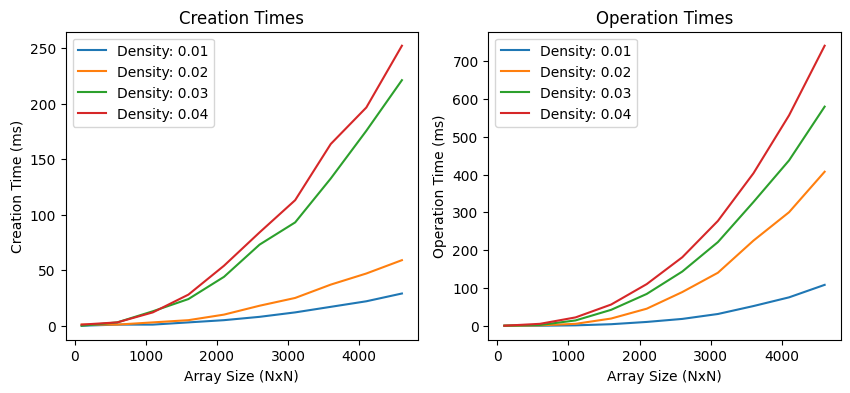

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for density in creation_times:
    ax1.plot(Xs, creation_times[density], label=f"Density: {density/100}")

ax1.set_title("Creation Times")
ax1.set_xlabel("Array Size (NxN)")
ax1.set_ylabel("Creation Time (ms)")
ax1.legend()

for density in op_times:
    ax2.plot(Xs, op_times[density], label=f"Density: {density/100}")

ax2.set_title("Operation Times")
ax2.set_xlabel("Array Size (NxN)")
ax2.set_ylabel("Operation Time (ms)")
ax2.legend()
plt.show()

In [33]:
max_size = 2000
max_density = 99

creation_times_np = defaultdict(list)
op_times_np = defaultdict(list)
Xs = []

for size in range(100, max_size + 1, 500):
    Xs.append(size)
    for density in range(1, max_density, 10):
        d = density / 100
        creation_time = time.time_ns()
        A = sp.random_array((size, size), density=d, rng=rng, format='csc')
        A = A.toarray()
        B = sp.random_array((size, size), density=d, rng=rng, format='coo')
        B = B.toarray()
        creation_time = time.time_ns() - creation_time
        op_time = time.time_ns()
        A @ B
        op_time = time.time_ns() - op_time

        creation_times_np[density].append([creation_time / 1e6])
        op_times_np[density].append([op_time / 1e6])

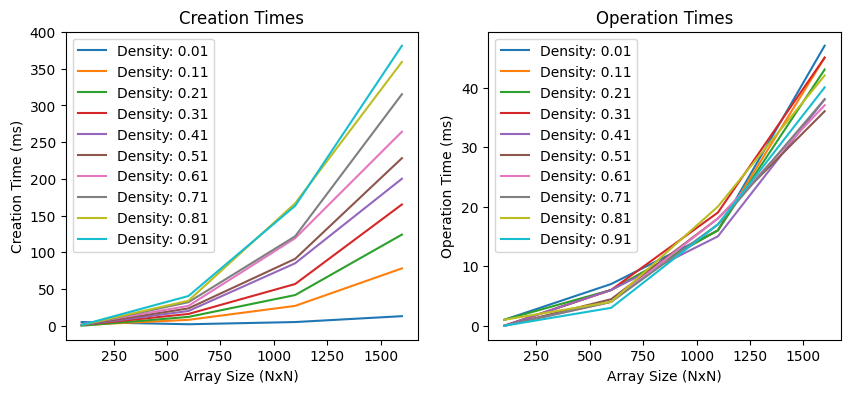

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for density in creation_times_np:
    ax1.plot(Xs, creation_times_np[density], label=f"Density: {density/100}")

ax1.set_title("Creation Times")
ax1.set_xlabel("Array Size (NxN)")
ax1.set_ylabel("Creation Time (ms)")
ax1.legend()

for density in op_times_np:
    ax2.plot(Xs, op_times_np[density], label=f"Density: {density/100}")

ax2.set_title("Operation Times")
ax2.set_xlabel("Array Size (NxN)")
ax2.set_ylabel("Operation Time (ms)")
ax2.legend()
plt.show()

1. Conversion between sparse to dense matrix is super fast (for this small N)
2. Sparse matrices are better when non-zeros << n^2

In [ ]:
size = 1000
d = 0.01
rng = np.random.default_rng(42)

A = sp.random_array((size, size), density=d, rng=rng, format='csc')
A.nonzero() # returns 

(array([  0,   0,   0, ..., 999, 999, 999]),
 array([  0,  80, 220, ..., 845, 929, 977]))